In [81]:
class Lin_Reg:

    def __init__(self):
        self.m = None
        self.b = None
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        X_mean = np.mean(X_train)
        y_mean = np.mean(y_train)
        for i in range(0, X_train.size):
            num += (X_train[i]-X_mean)*(y_train[i]-y_mean)
            den += np.square(X_train[i]-X_mean)
        self.m = num/den
        self.b = y_mean - self.m * X_mean

    def predict(self, X_test): 
        return self.m * X_test + self.b;

In [82]:
from sklearn.datasets import load_linnerud
exer = load_linnerud()

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [84]:
df = pd.DataFrame(data = exer.data, columns = exer.feature_names)
df[exer.target_names] = exer.target

In [85]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [86]:
y = df.iloc[:, 4].to_numpy()
X = df.iloc[:, 3].to_numpy()

In [87]:
lr = Lin_Reg()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 2)


In [89]:
lr.fit(X_train, y_train)

In [90]:
test_data = pd.concat([pd.Series(X_test), pd.Series(y_test)], axis = 1)

In [91]:
test_data

,0,1
0,154.0,34.0
1,189.0,35.0
2,156.0,33.0
3,191.0,36.0


In [93]:
lr.predict(X_test)

array([32.51667035, 36.68093974, 32.75462861, 36.91889799])

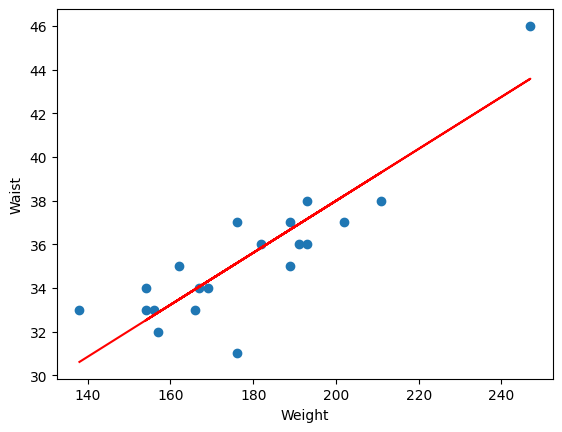

In [97]:
plt.scatter(X, y)
plt.xlabel("Weight")
plt.ylabel("Waist")
plt.plot(X, lr.predict(X), color = 'r')

In [98]:
lr.m

np.float64(0.11897912517518625)

In [99]:
lr.b

np.float64(14.193885077819576)